In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest


In [4]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

In [6]:
data=pd.read_csv(r'C:\Users\navee\Downloads\IBM-PORJECT-IMPROVING-DATA-ACCURACY-IN-CRM-USING-AI-main\IBM-PORJECT-IMPROVING-DATA-ACCURACY-IN-CRM-USING-AI-main\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.shape

(7043, 21)

In [9]:
print("Null values present\n",data.isnull().sum())

Null values present
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
features=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for feature in features:
    print(data[feature].unique())


['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [15]:
new_data = pd.read_csv(r"C:\Users\navee\Downloads\IBM-PORJECT-IMPROVING-DATA-ACCURACY-IN-CRM-USING-AI-main\IBM-PORJECT-IMPROVING-DATA-ACCURACY-IN-CRM-USING-AI-main\WA_Fn-UseC_-Telco-Customer-Churn.csv")
pattern = r"^\d{4}-[A-Z]{4}[A-Z]{1}$"
new_data["valid_customerID"] = new_data["customerID"].str.match(pattern)
invalid_customerID = new_data[~new_data["valid_customerID"]]

if invalid_customerID.empty:
    print("No invalid customerID found.")
else:
    print("Invalid customerIDs found:")
    print(invalid_customerID)


No invalid customerID found.


In [16]:
encoder=LabelEncoder()
for feature in features:
    data[feature]=encoder.fit_transform(data[feature])

In [17]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [19]:
data['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [20]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [21]:
data=data.drop(columns=['customerID'],axis=1)

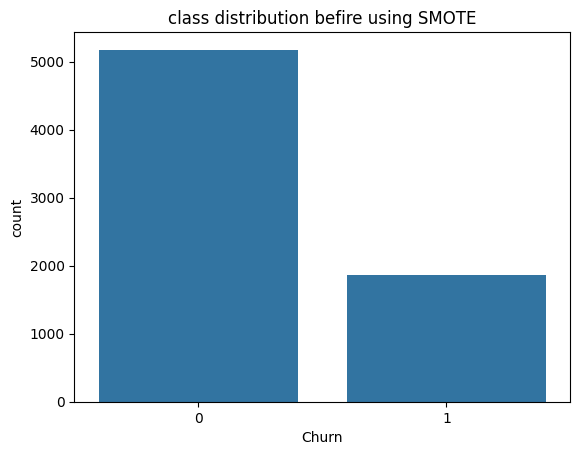

In [22]:
sns.countplot(x='Churn',data=data)
plt.title("class distribution befire using SMOTE")
plt.show()

In [23]:
X=data.drop(columns=['Churn'],axis=1)
Y=data['Churn']

In [24]:
smote=SMOTE(random_state=45,k_neighbors=5,sampling_strategy='minority')
X_sampled,Y_sampled=smote.fit_resample(X,Y)

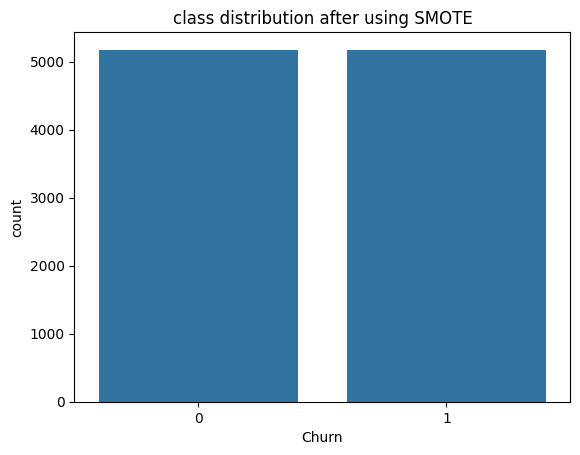

In [25]:
sns.countplot(x='Churn',data=pd.DataFrame(Y_sampled))
plt.title("class distribution after using SMOTE")
plt.show()

In [26]:
print("after resampled",Y_sampled.value_counts())

after resampled Churn
0    5174
1    5174
Name: count, dtype: int64


In [27]:
X_sampled.shape

(10348, 19)

In [28]:
sampled_data = pd.concat([X_sampled, Y_sampled], axis=1)

In [29]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10348 non-null  int64  
 1   SeniorCitizen     10348 non-null  int64  
 2   Partner           10348 non-null  int64  
 3   Dependents        10348 non-null  int64  
 4   tenure            10348 non-null  int64  
 5   PhoneService      10348 non-null  int64  
 6   MultipleLines     10348 non-null  int64  
 7   InternetService   10348 non-null  int64  
 8   OnlineSecurity    10348 non-null  int64  
 9   OnlineBackup      10348 non-null  int64  
 10  DeviceProtection  10348 non-null  int64  
 11  TechSupport       10348 non-null  int64  
 12  StreamingTV       10348 non-null  int64  
 13  StreamingMovies   10348 non-null  int64  
 14  Contract          10348 non-null  int64  
 15  PaperlessBilling  10348 non-null  int64  
 16  PaymentMethod     10348 non-null  int64 

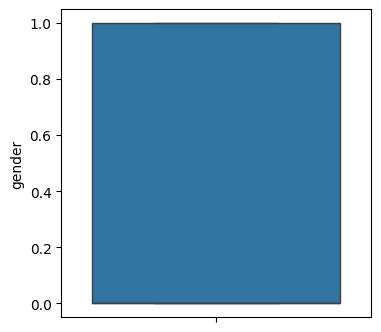

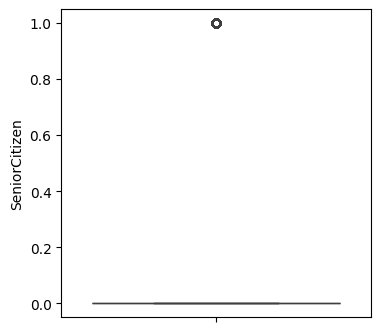

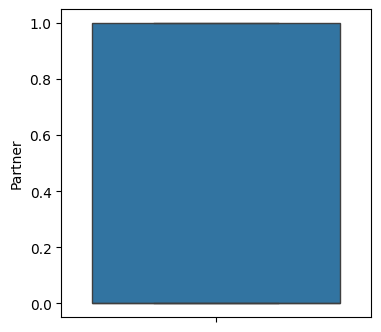

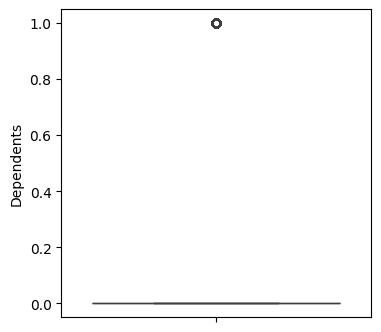

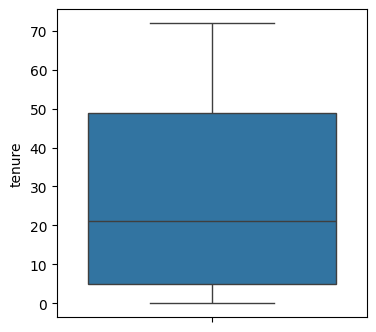

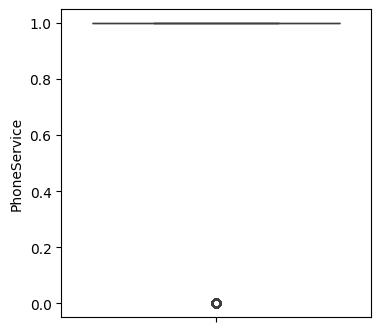

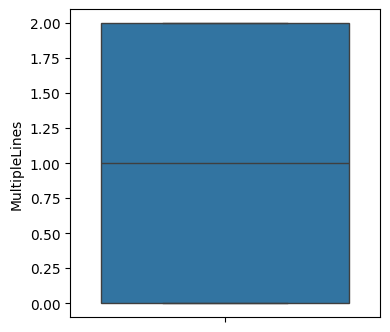

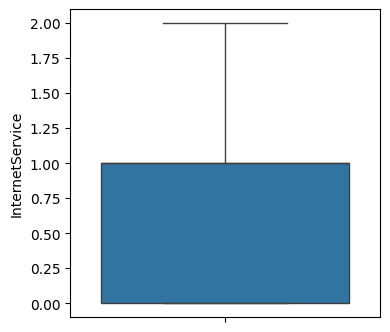

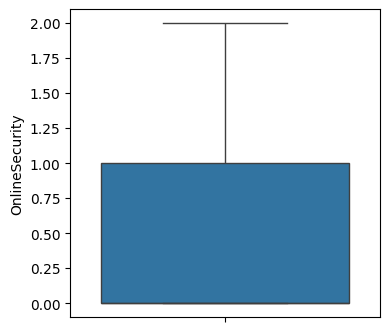

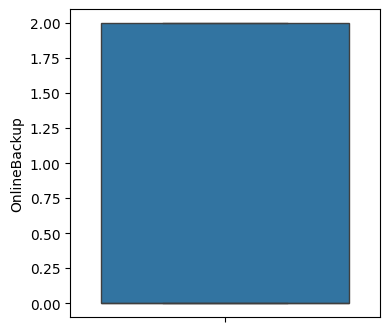

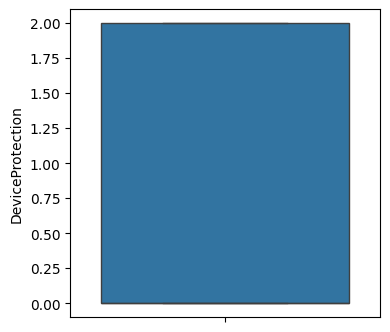

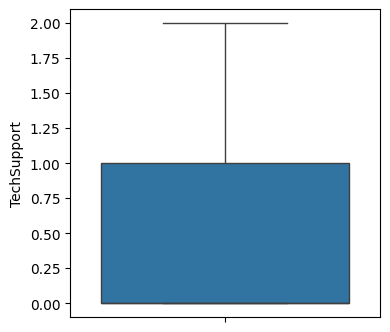

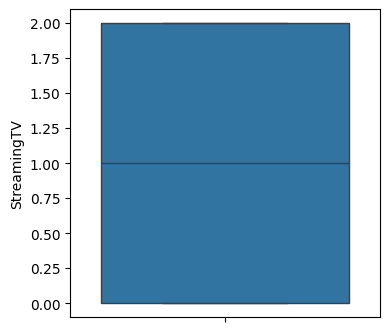

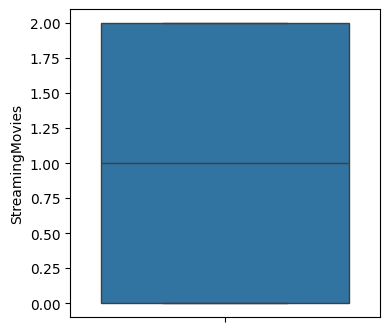

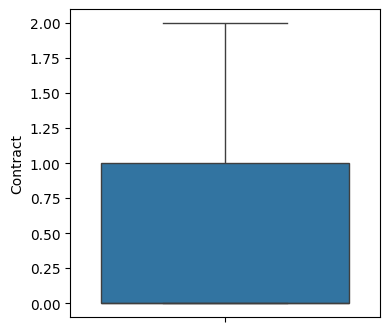

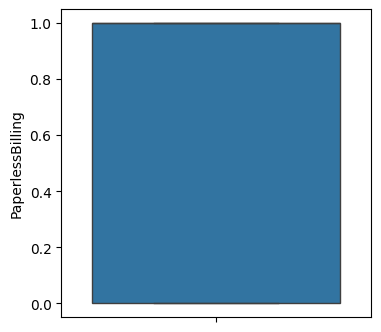

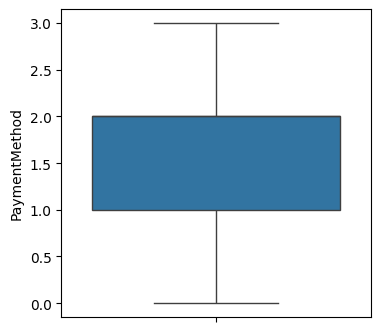

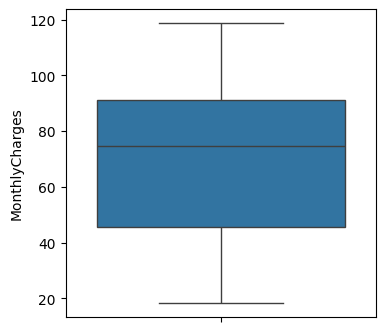

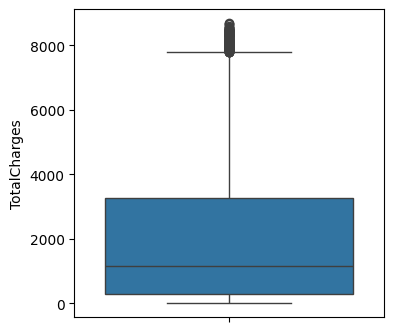

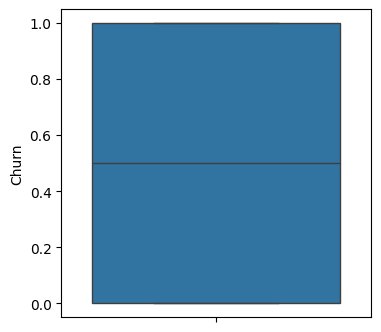

In [30]:
for clom in sampled_data.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(sampled_data[clom])
    plt.show()

In [31]:
iso =IsolationForest(contamination=0.01, random_state=42)
sampled_data['Anomaly'] = iso.fit_predict(sampled_data.iloc[:, :-1])
outliers =sampled_data [sampled_data['Anomaly'] == -1]
data_cleaned= sampled_data[sampled_data['Anomaly'] == 1].drop(columns=['Anomaly'])
print(f"Number of Outliers Detected:{len(outliers)}")

Number of Outliers Detected:104


In [32]:
data_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151,1


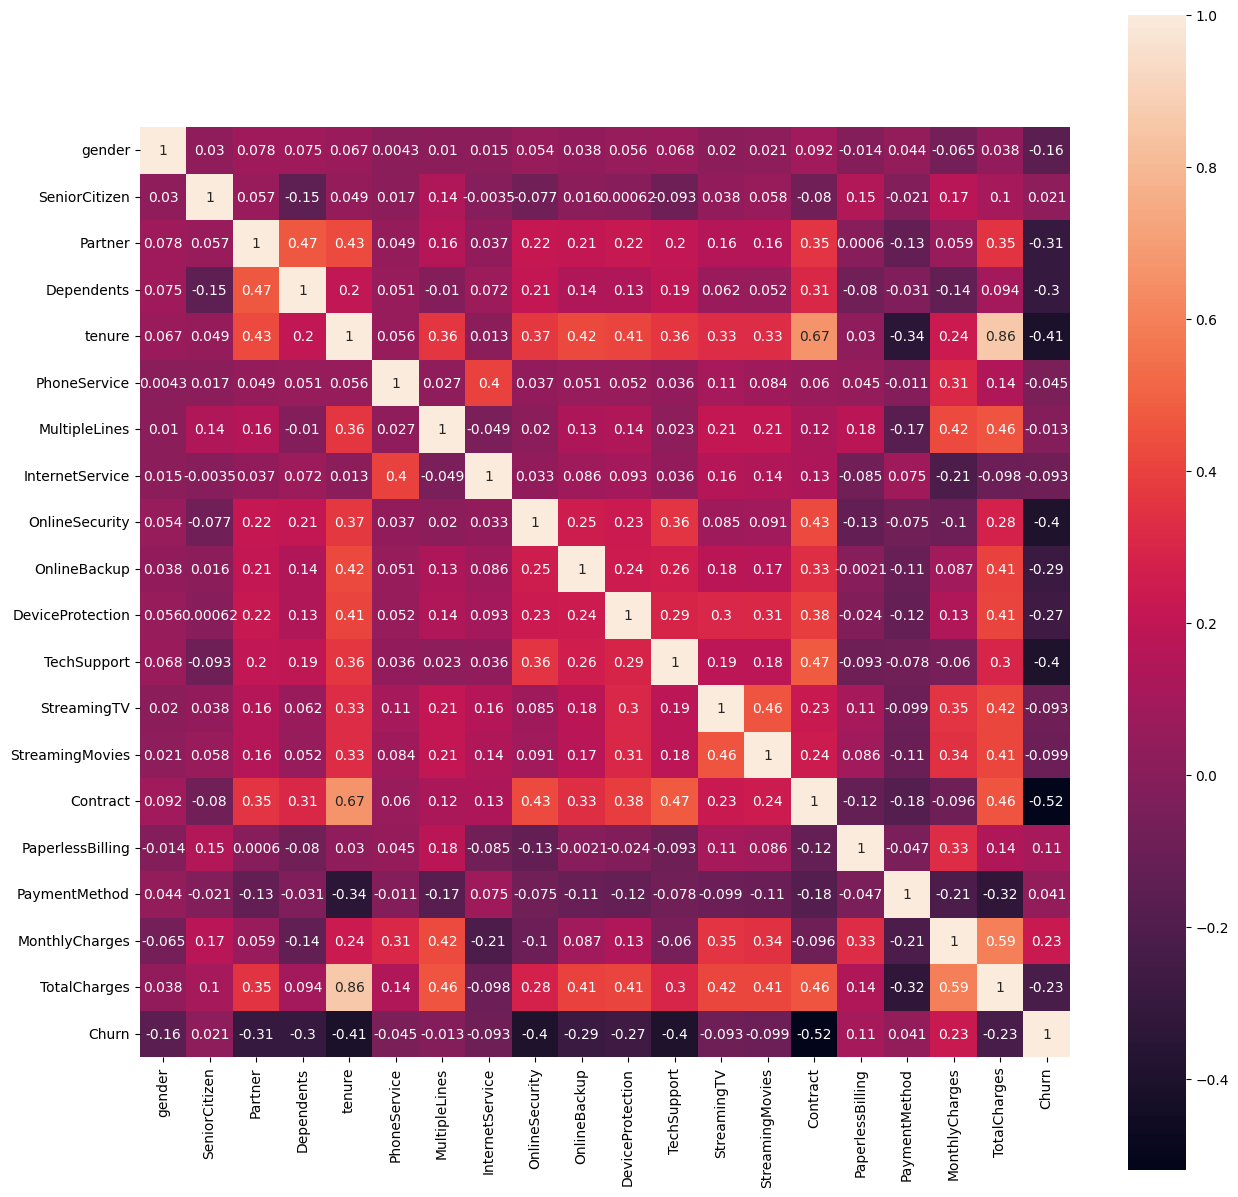

In [33]:
coorelation_matrix=data_cleaned.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coorelation_matrix, annot=True, square=True)
plt.show()

In [34]:

columns_to_drop = ['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'MultipleLines','DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod','Churn']
X = data_cleaned.drop(columns=columns_to_drop)
print(X.head())

   Dependents  tenure  InternetService  OnlineSecurity  OnlineBackup  StreamingTV  StreamingMovies  Contract  MonthlyCharges  TotalCharges
0           0       1                0               0             2            0                0         0           29.85            29
1           0      34                0               2             0            0                0         1           56.95          1889
2           0       2                0               2             2            0                0         0           53.85           108
3           0      45                0               2             0            0                0         1           42.30          1840
4           0       2                1               0             0            0                0         0           70.70           151


In [35]:
Y=data_cleaned['Churn']

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=12,test_size=0.2,stratify=Y)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(10244, 10) (8195, 10) (2049, 10)


In [38]:
print(Y.shape,Y_train.shape,Y_test.shape)

(10244,) (8195,) (2049,)


In [39]:
xgb_model=xgb.XGBClassifier(n_estimators=110, eval_metric='logloss',alpha=0.1,reg_lambda=1,learning_rate=0.05)
xgb_model.fit(X_train, Y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=110,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:
X_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8530811470408786


In [41]:
X_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy) 

Accuracy on Test data :  0.8208882381649585


In [42]:
Y_pred = xgb_model.predict(X)

In [43]:
print("Classification Report:\n", classification_report(Y, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      5073
           1       0.83      0.88      0.85      5171

    accuracy                           0.85     10244
   macro avg       0.85      0.85      0.85     10244
weighted avg       0.85      0.85      0.85     10244



In [44]:
cm = confusion_matrix(Y, Y_pred)

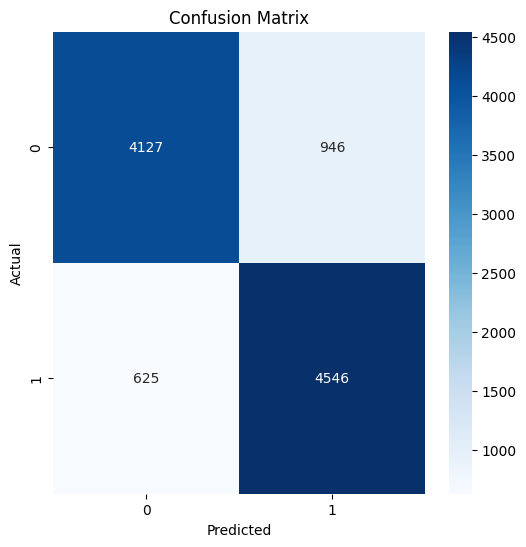

In [45]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
input_data = (0	,34,	0,	2,	0,	0,	0,	1,	56.95,	1889)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgb_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not churn i.e, the customers will not leave')
else:
  print('The Person will churn i.e, they will leave')

[0]
The Person does not churn i.e, the customers will not leave
